In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

### making a bigram language model 

In [17]:
bigram_dict = {}

for w in words[]:
    # giving start and end bigrams to these words,
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        #mapping out the bigrams frequencies in the dict
        bigram_dict[bigram] = bigram_dict.get(bigram, 0 ) + 1
    

In [23]:
# sorting to see the frequency based on the count

sorted(bigram_dict.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
'''
it is convenient to store this information in 2D array than dict
the rows are first character and column are going to be second character

we are going to use tensor for it from pytorch
''' 
import torch

#### some basics of tensor from pytorch 

In [37]:
a = torch.zeros((3,5)) # this gives float values in default(float32)
print('Datatype->', a, a.dtype)
a = torch.zeros((3,5), dtype = torch.int32)# changing datatype to int
a

# we can see here that it is 2D matrix, 3 rows with 5 columns

Datatype-> tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) torch.float32


tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [41]:
# we can manipulate in the tensor easily 

a[1,3] +=1 
a[0,0] = 5
a

tensor([[5, 0, 0, 0, 0],
        [0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [59]:
'''
now for our use case we have 26 alphabets in english dictionary and 
2 more characters <S>, <E> so choosing to make a tensor of 28*28
''' 

N = torch.zeros((28,28), dtype = torch.int32)


In [4]:
# now we have to index each character based on the number so have to make a dict

chars = sorted(set(("").join(words)))
#string to integer (stoi)
stoi  = { s:i for i,s in enumerate(chars)}
# adding extra characters too in the dict in end 

stoi['<S>'] = 26
stoi['<E>'] = 27


In [60]:
# now we are going to map these words in the tensor
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        # getting the index of these characters and put them in the tensor we made N
        index_of_ch1 = stoi[ch1]
        index_of_ch2 = stoi[ch2]
        #print(index_of_ch1, index_of_ch2)
        N[index_of_ch1, index_of_ch2] += 1

In [68]:
itos = {i:s for s,i in stoi.items()}

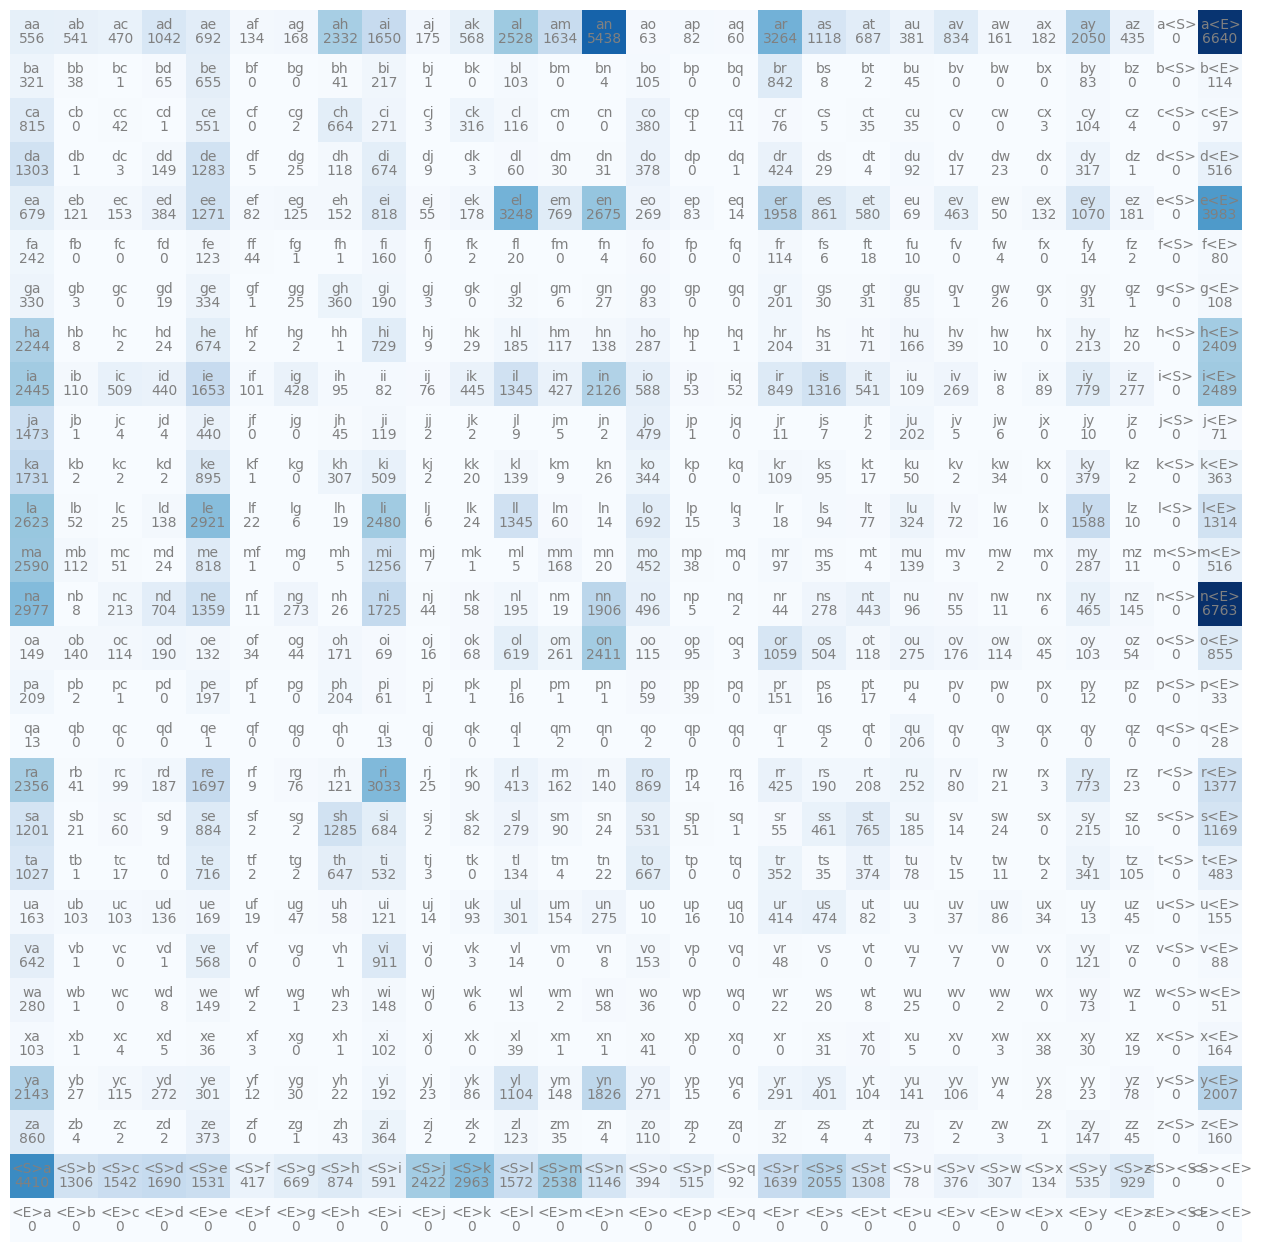

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (16,16))
plt.imshow(N,cmap = "Blues")

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center",va="bottom",color="gray")
        plt.text(j, i, N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off');

##### after the observation from the above heatmap we can say that we are wasting some space here as last row is containing all zeroes bcoz there will be no character after `<E>` same as second last column is zero too as there will be no character before `<S>` charcrter so we will correct it here by removing `<E>` `<S>`  these special characters by replacing it with `.` only. We dont need 2 special characters.

In [8]:
N = torch.zeros((27,27), dtype = torch.int32)
chars = sorted(set(("").join(words)))
# now we are adding only one extra character that is <.> which is going to be in the stored at 0
stoi  = { s:i+1 for i,s in enumerate(chars)}
# adding extra characters too in the dict in end 
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [82]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        # getting the index of these characters and put them in the tensor we made N
        index_of_ch1 = stoi[ch1]
        index_of_ch2 = stoi[ch2]
        #print(index_of_ch1, index_of_ch2)
        N[index_of_ch1, index_of_ch2] += 1

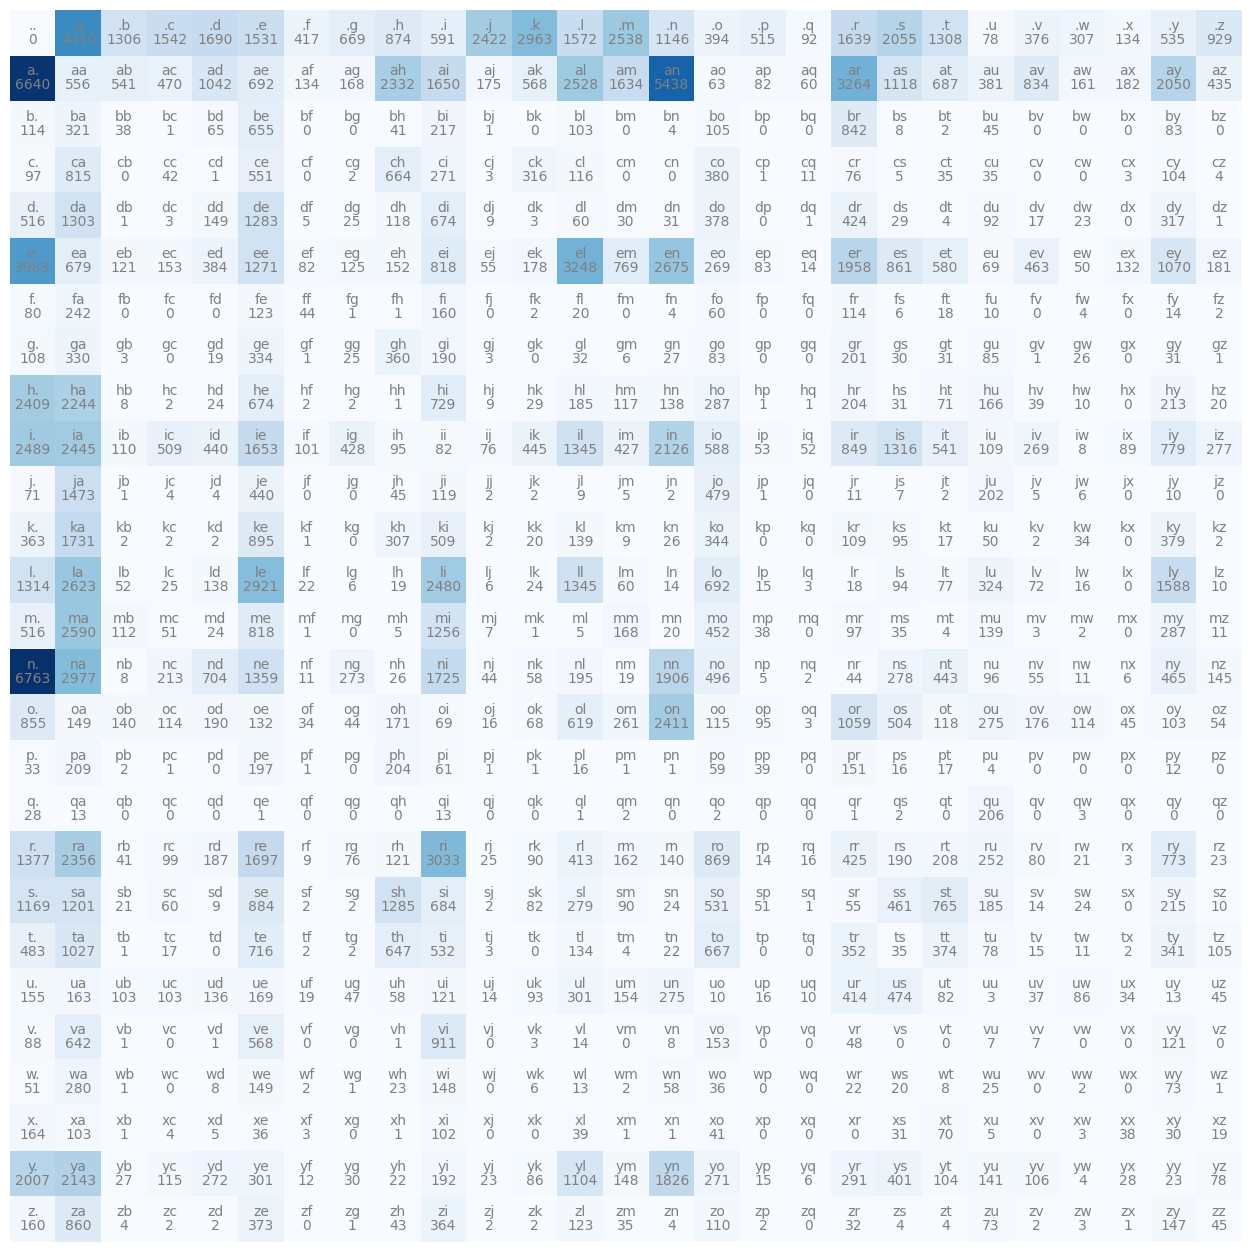

In [84]:
plt.figure(figsize= (16,16))
plt.imshow(N,cmap = "Blues")

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center",va="bottom",color="gray")
        plt.text(j, i, N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off');

#### from above heatmap in the first row we can infer that the probabilities of starting word from that character is there 

In [90]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [91]:
# by adding all the words from above row we can see that those were the total words we have 
N[0].sum()

tensor(32033)

In [93]:
''' Now we are going to make the proabability distribution of 
these words, by dividing them through total number of words, also we have to make them float as we
 are going to normalize the count of words from that character by total words'''


probability = N[0].float()
probability = probability / probability.sum()
probability

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [95]:
'''
 now these are the proababilities so their sum would be 1 in total we can say this is nice proabability 
 distribution which sums to 1 and it gives us the 
 probability of any single character to be the first character of the word
'''


probability.sum()

tensor(1.)

#### Now we are going to sample this above distribution by using torch.multinomial 

##### some basics of sampling, we are generating some random numbers and based on that we are using multinomial to generate samples

In [102]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [103]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

##### Now use this in our use case in bigram using generator and multinomial 
###### getting the samples from the above heatmap by making probabilities and selecting samples from these


In [108]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [119]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    sample_list = []
    index = 0
    while True:
        """the below two line are not efficient as we are making the probabilities 
           again and again on every loop
           so we are going to design the heatmap of the count of words into """
        probability = N[index].float()
        probability = probability / probability.sum()
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        sample_list.append(itos[index])
        if index == 0:
    #         print(probability)
            break
    print("".join(sample_list))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [123]:

probability.shape

torch.Size([27])

In [124]:
""" Making new tensor which will be having the probabities 
instead of the counts of words for making the above loop efficient"""


PROBABILITIES = N.float()

In [126]:
PROBABILITIES.shape

torch.Size([27, 27])

#### Now adding all the sums of the rows in the first co lumns so we can divide each 0,0 index count value by the this sum, using keepdim parameter True of the torch sum function
##### = > PROBABILITIES.sum(1, keepdim= True)


In [129]:
PROBABILITIES.sum(1, keepdim= True).shape

torch.Size([27, 1])

"""now PROBABILITIES has dimension of [27, 27] and PROBABILITIES.sum(1, keepdim= True).shape has [27,1]

what it will do when we divide PROBABILITIES by PROBABILITIES.sum it will divide the PROBABILITIES elementwise """

In [130]:
# now dividing the probabilities by their sum 

PROBABILITIES = PROBABILITIES / PROBABILITIES.sum(1, keepdim= True)


In [131]:
# now if we check the sum of 1st row in PROBABILITIES it should be 1 

PROBABILITIES[0].sum()

tensor(1.)

Now what will happen if we dont use keepdim = True ??? This is the where we have to pay attention towarsd broadcasting semantics, and rules should be followed while doing this. 

In [138]:
# so if keepdim is not true 
P_withoutdim = N.float()

P_withoutdim = P_withoutdim / P_withoutdim.sum(1)


In [139]:
P_withoutdim[0].sum()

tensor(7.0225)

We can see here that the sum of these probabilities are not 1 as we have divided the probabilities in a wrong way. the reason is broadcasting semantics will add the dimension to the shape of vector as [1, 27] and it is a row so it will divide that [27, 27] probabilities tensor in that way and that is going to give us garbage result. SO have to be very careful while doing this. 

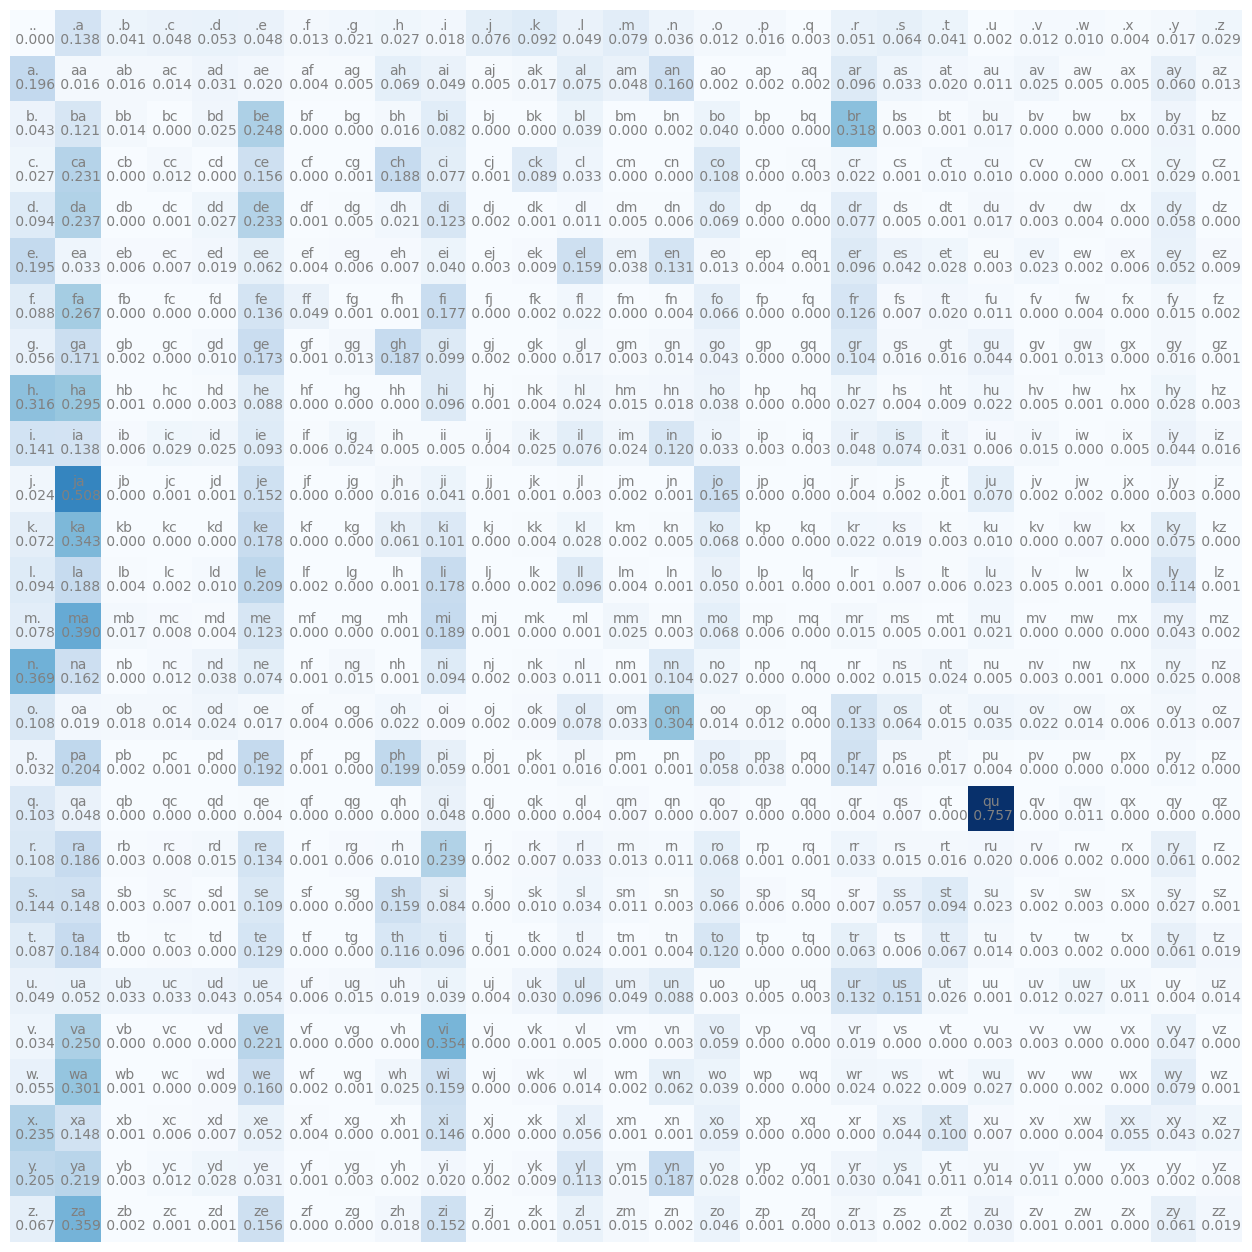

In [137]:
# generating the heatmap too 

plt.figure(figsize= (16,16))
plt.imshow(PROBABILITIES,cmap = "Blues")

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center",va="bottom",color="gray")
        # formating the probs so we can see these otherwise they are in large decimals
        prob = f'{PROBABILITIES[i,j].item(): .3f}'
        plt.text(j, i, prob,ha="center",va="top",color="gray")
plt.axis('off');


In [185]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    sample_list = []
    index = 0
    while True:
        """the below two line are not efficient as we are making the probabilities 
           again and again on every loop
           so we are going to design the heatmap of the count of words into """
#         probability = N[index].float()
#         probability = probability / probability.sum()
        probability = PROBABILITIES[index]
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        sample_list.append(itos[index])
        if index == 0:
    #         print(probability)
            break
    print("".join(sample_list))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [186]:
# without dim we will get garbage values 

g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    sample_list = []
    index = 0
    while True:
        """the below two line are not efficient as we are making the probabilities 
           again and again on every loop
           so we are going to design the heatmap of the count of words into """
#         probability = N[index].float()
#         probability = probability / probability.sum()
        probability = P_withoutdim[index]
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        sample_list.append(itos[index])
        if index == 0:
    #         print(probability)
            break
    print("".join(sample_list))

prrabuxclssoxxxxzontantorsemrdef.
ppprluzavilavegunjemahekwiffffksslyndomdeyviu.
jadw.
chinzwamikojowivighoumo.
ch.
h.
bismoricaysuwarliovouxigydeygwrophognuzylywttlequssphwttylequghuwelluwyzovofrusredaych.
mphialigrorotopopaqudox.
guzowazlelihmandyzyuppstttugububrrdaowupouxxxsstharrigjowahopph.
uchlewondextowbluthixxahzziotw.


### Evaluation of the above model, we trained it and gets samples from it and will see how to evaluate it

#### Goal
```
-maximize likelihood of the data w.r.t model parameters (statistical modeling) 
-equivalent to maximizing the log likelihood (because log is monotonic)
-equivalent to minimizing the negative log likelihood
-equivalent to minimizing the average negative log likehood
```

In [159]:
# log(a*b*c) = log(a) + log(b) + log(c)


log_likelihood = 0.0
normalized_count = 0

# for 3 words 
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexof1stchar = stoi[ch1]
        indexof2ndchar = stoi[ch2]
        prob = PROBABILITIES[indexof1stchar, indexof2ndchar]
        logprob= torch.log(prob)
        normalized_count += 1
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}')

print(f'{log_likelihood=}')

# negative log likelihood
negative_log_likelihood = -log_likelihood

print(f'{negative_log_likelihood=}')

## normalized_log_likelihood 

print(f'{negative_log_likelihood/normalized_count=}')

#""" negative likelihood is the loss function because lowest it can get is zero and the higher it is the worst 
#predictions are making"""

.e:  0.0478 -3.0408
em:  0.0377 -3.2793
mm:  0.0253 -3.6772
ma:  0.3899 -0.9418
a.:  0.1960 -1.6299
.o:  0.0123 -4.3982
ol:  0.0780 -2.5508
li:  0.1777 -1.7278
iv:  0.0152 -4.1867
vi:  0.3541 -1.0383
ia:  0.1381 -1.9796
a.:  0.1960 -1.6299
.a:  0.1377 -1.9829
av:  0.0246 -3.7045
va:  0.2495 -1.3882
a.:  0.1960 -1.6299
log_likelihood=tensor(-38.7856)
negative_log_likelihood=tensor(38.7856)
negative_log_likelihood/normalized_count=tensor(2.4241)


In [162]:
log_likelihood = 0.0
normalized_count = 0

# for entire training set
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexof1stchar = stoi[ch1]
        indexof2ndchar = stoi[ch2]
        prob = PROBABILITIES[indexof1stchar, indexof2ndchar]
        logprob= torch.log(prob)
        normalized_count += 1
        log_likelihood += logprob

print(f'{log_likelihood=}')

# negative log likelihood
negative_log_likelihood = -log_likelihood

print(f'{negative_log_likelihood=}')

## normalized_log_likelihood 

print(f'{negative_log_likelihood/normalized_count=}')

log_likelihood=tensor(-559891.7500)
negative_log_likelihood=tensor(559891.7500)
negative_log_likelihood/normalized_count=tensor(2.4541)


In [166]:
  # testing this model on some random names 
log_likelihood = 0.0
normalized_count = 0

# for entire training set
for w in ["dhruv"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexof1stchar = stoi[ch1]
        indexof2ndchar = stoi[ch2]
        prob = PROBABILITIES[indexof1stchar, indexof2ndchar]
        logprob= torch.log(prob)
        normalized_count += 1
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}')

print(f'{log_likelihood=}')

# negative log likelihood
negative_log_likelihood = -log_likelihood

print(f'{negative_log_likelihood=}')

## normalized_log_likelihood 

print(f'{negative_log_likelihood/normalized_count=}')

.d:  0.0528 -2.9420
dh:  0.0215 -3.8411
hr:  0.0268 -3.6199
ru:  0.0198 -3.9199
uv:  0.0118 -4.4395
v.:  0.0342 -3.3755
log_likelihood=tensor(-22.1379)
negative_log_likelihood=tensor(22.1379)
negative_log_likelihood/normalized_count=tensor(3.6897)


so it is saying that probability of dhruv is very unlikely as all the word dependency are very less 

In [167]:
  # testing this model on some random names 
log_likelihood = 0.0
normalized_count = 0

# for entire training set
for w in ["pddy"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexof1stchar = stoi[ch1]
        indexof2ndchar = stoi[ch2]
        prob = PROBABILITIES[indexof1stchar, indexof2ndchar]
        logprob= torch.log(prob)
        normalized_count += 1
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}')

print(f'{log_likelihood=}')

# negative log likelihood
negative_log_likelihood = -log_likelihood

print(f'{negative_log_likelihood=}')

## normalized_log_likelihood 

print(f'{negative_log_likelihood/normalized_count=}')

.p:  0.0161 -4.1304
pd:  0.0000 -inf
dd:  0.0271 -3.6078
dy:  0.0577 -2.8529
y.:  0.2053 -1.5833
log_likelihood=tensor(-inf)
negative_log_likelihood=tensor(inf)
negative_log_likelihood/normalized_count=tensor(inf)


In pddy name as we can see that the loss is inf means that model in never going to predict this name and the reason for this is coming of 'd' after 'p' this probability is 0 which makes the loss infinity, this is not good so we have to do some model smoothining by adding "1" to these probabilities to all of these so it will not give infinity to us. "1" is a decent we can add something else too but it is recommended, it we add large numbers then the model will become more uniform...as more uniformity will be there in the model.


In [168]:
# Now to deal with that inf we can do model smoothining 

Probabs_tensor = (N+1).float() # add 1 to all the counts of the words
Probabs_tensor /= Probabs_tensor.sum(1, keepdim= True) 

g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    sample_list = []
    index = 0
    while True:
        probability = Probabs_tensor[index]
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        sample_list.append(itos[index])
        if index == 0:
            break
    print("".join(sample_list))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [169]:
log_likelihood = 0.0
normalized_count = 0

# for entire training set
for w in ["pddy"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexof1stchar = stoi[ch1]
        indexof2ndchar = stoi[ch2]
        prob = Probabs_tensor[indexof1stchar, indexof2ndchar]
        logprob= torch.log(prob)
        normalized_count += 1
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}')

print(f'{log_likelihood=}')

# negative log likelihood
negative_log_likelihood = -log_likelihood

print(f'{negative_log_likelihood=}')

## normalized_log_likelihood 

print(f'{negative_log_likelihood/normalized_count=}')

.p:  0.0161 -4.1293
pd:  0.0009 -6.9594
dd:  0.0272 -3.6060
dy:  0.0576 -2.8546
y.:  0.2048 -1.5855
log_likelihood=tensor(-19.1349)
negative_log_likelihood=tensor(19.1349)
negative_log_likelihood/normalized_count=tensor(3.8270)


#### now we can see that it is not infinity for the names like paddy as we have added 1 to each of the word counts this is smoothing

#### Part 2 making Neural Net

In [14]:
# create the training set of all the bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
                       
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [12]:
xs

tensor([ 0,  5, 13, 13,  1])

In [13]:
ys

tensor([ 5, 13, 13,  1,  0])

In [15]:
# one hot encoding -- feeding vector of all zeroes except the int number which will be 1

import torch.nn.functional as F

#xencoded 
xenc = F.one_hot(xs, num_classes = 27)# 27 classes as 27 alphabets are there
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [16]:
xenc.shape

torch.Size([5, 27])

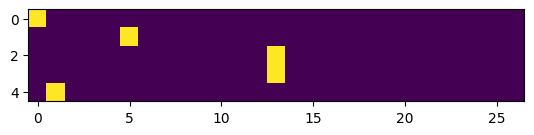

In [18]:
import matplotlib.pyplot as plt

plt.imshow(xenc)

"""

We need to change the dtype of the one hot encoded vector to float so
it can be given to neural net
"""


In [19]:
xenc.dtype    

torch.int64

In [21]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
xenc.shape

torch.Size([5, 27])

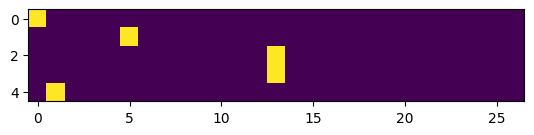

In [24]:
plt.imshow(xenc)

In [25]:
xenc.dtype

torch.float32

In [28]:
# defininig the initial weights

W = torch.randn((27,1))

# matrix multiplication of these W with the xenc

xenc @ W


tensor([[ 0.1933],
        [-0.3496],
        [ 0.2709],
        [ 0.2709],
        [-0.4781]])

We can see above that now it is (5*1) tensor as we multiplied 
(5,27) and (27,1) => (5,1) tensor and these are the activation on these 5 inputs 

=> Wx+b there is no b for now. 

but we need activation of all 27 neurons based on these inputs which can be achieved by multiplying 27*27 random W matrix
  

In [31]:
W = torch.randn((27,27))

xenc @ W # @ represents matric multiplication in pytorch


tensor([[-2.6672,  0.1570, -0.9705,  2.2134,  1.4219,  0.0790, -0.1717,  1.8512,
          0.1074, -0.3098, -0.9348, -2.5673,  0.6143, -0.2305,  0.8406, -0.8542,
          1.3902,  0.0708, -0.5846,  0.2780,  0.7723,  2.2400,  0.3119,  1.7756,
          1.5097,  1.9729,  0.0485],
        [ 0.4596, -0.5882,  1.3846, -1.4841, -1.7053,  0.0794,  2.0263,  0.0487,
         -1.8680,  0.2391, -1.0082,  0.5967,  0.2902, -0.3450,  0.4291, -1.4891,
         -0.3923, -1.8193,  0.1682,  1.1490,  0.8168, -0.9192,  1.9337, -0.2390,
          0.3338, -1.4580, -0.1066],
        [-0.1431,  0.3584, -0.4218, -0.6254, -1.8403, -0.1687,  1.8576,  0.0087,
          1.2479, -0.0222,  0.6768,  2.2923,  0.4731,  0.4985,  1.3617,  1.3472,
         -1.2167,  0.0795,  0.1991, -1.5618, -0.6935,  0.5630, -1.1892,  1.3621,
         -0.8823, -1.1398, -0.2905],
        [-0.1431,  0.3584, -0.4218, -0.6254, -1.8403, -0.1687,  1.8576,  0.0087,
          1.2479, -0.0222,  0.6768,  2.2923,  0.4731,  0.4985,  1.3617,  1.3472

In [33]:
(xenc @ W)[3,13] # 

tensor(0.4985)

In [34]:
# we can see that it is 3rd column of the xenc is dot product with W's 13 vector

xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
W[:, 13]

tensor([-0.2305,  0.6327,  0.9029, -0.3351, -1.3931, -0.3450,  0.4786,  0.1305,
        -0.6885, -1.8720,  0.4027,  1.4974, -0.6810,  0.4985, -0.7723,  0.6411,
        -1.7563, -1.2170, -0.5470, -0.2847, -0.7371,  0.8288,  0.2226,  0.4121,
        -1.3951,  1.3623, -1.1038])

In [37]:
(xenc[3] * W[:, 13]).sum() # <- W.x -> dot product which is same as above

tensor(0.4985)


(5,27) @ (27,27) -> (5,27)



""" we can see that above weights are positive as well as negative which is 
    not good so we take the exponent of these values which makes 
    these numbers to be positive 
    
 - we are going to interpret as log counts as we had in bigram model 
""" 



In [38]:
(xenc @ W)

tensor([[-2.6672,  0.1570, -0.9705,  2.2134,  1.4219,  0.0790, -0.1717,  1.8512,
          0.1074, -0.3098, -0.9348, -2.5673,  0.6143, -0.2305,  0.8406, -0.8542,
          1.3902,  0.0708, -0.5846,  0.2780,  0.7723,  2.2400,  0.3119,  1.7756,
          1.5097,  1.9729,  0.0485],
        [ 0.4596, -0.5882,  1.3846, -1.4841, -1.7053,  0.0794,  2.0263,  0.0487,
         -1.8680,  0.2391, -1.0082,  0.5967,  0.2902, -0.3450,  0.4291, -1.4891,
         -0.3923, -1.8193,  0.1682,  1.1490,  0.8168, -0.9192,  1.9337, -0.2390,
          0.3338, -1.4580, -0.1066],
        [-0.1431,  0.3584, -0.4218, -0.6254, -1.8403, -0.1687,  1.8576,  0.0087,
          1.2479, -0.0222,  0.6768,  2.2923,  0.4731,  0.4985,  1.3617,  1.3472,
         -1.2167,  0.0795,  0.1991, -1.5618, -0.6935,  0.5630, -1.1892,  1.3621,
         -0.8823, -1.1398, -0.2905],
        [-0.1431,  0.3584, -0.4218, -0.6254, -1.8403, -0.1687,  1.8576,  0.0087,
          1.2479, -0.0222,  0.6768,  2.2923,  0.4731,  0.4985,  1.3617,  1.3472

In [39]:
# making all of these positive 
# this is counts as we made N in bigram

(xenc @ W).exp()

# we can see all the negative nos from above will become less than 1 but greater than 0 
# and all the positive nos became more positive after exponent

tensor([[0.0694, 1.1700, 0.3789, 9.1468, 4.1450, 1.0822, 0.8423, 6.3675, 1.1134,
         0.7336, 0.3927, 0.0767, 1.8484, 0.7942, 2.3178, 0.4256, 4.0156, 1.0733,
         0.5573, 1.3205, 2.1648, 9.3931, 1.3660, 5.9036, 4.5256, 7.1916, 1.0497],
        [1.5834, 0.5553, 3.9931, 0.2267, 0.1817, 1.0827, 7.5860, 1.0499, 0.1544,
         1.2701, 0.3649, 1.8162, 1.3367, 0.7082, 1.5359, 0.2256, 0.6755, 0.1621,
         1.1832, 3.1551, 2.2633, 0.3989, 6.9151, 0.7874, 1.3963, 0.2327, 0.8989],
        [0.8666, 1.4311, 0.6559, 0.5351, 0.1588, 0.8448, 6.4082, 1.0087, 3.4831,
         0.9780, 1.9676, 9.8979, 1.6050, 1.6462, 3.9028, 3.8468, 0.2962, 1.0827,
         1.2203, 0.2098, 0.4998, 1.7560, 0.3045, 3.9045, 0.4138, 0.3199, 0.7479],
        [0.8666, 1.4311, 0.6559, 0.5351, 0.1588, 0.8448, 6.4082, 1.0087, 3.4831,
         0.9780, 1.9676, 9.8979, 1.6050, 1.6462, 3.9028, 3.8468, 0.2962, 1.0827,
         1.2203, 0.2098, 0.4998, 1.7560, 0.3045, 3.9045, 0.4138, 0.3199, 0.7479],
        [0.8029, 0.6212,

In [40]:
# breaking above in terms of ML 
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N in bigram
# now making the probabilities based on the counts 
probs = counts / counts.sum(1, keepdims= True)
probs

tensor([[0.0010, 0.0168, 0.0055, 0.1317, 0.0597, 0.0156, 0.0121, 0.0917, 0.0160,
         0.0106, 0.0057, 0.0011, 0.0266, 0.0114, 0.0334, 0.0061, 0.0578, 0.0155,
         0.0080, 0.0190, 0.0312, 0.1352, 0.0197, 0.0850, 0.0651, 0.1035, 0.0151],
        [0.0379, 0.0133, 0.0957, 0.0054, 0.0044, 0.0259, 0.1817, 0.0252, 0.0037,
         0.0304, 0.0087, 0.0435, 0.0320, 0.0170, 0.0368, 0.0054, 0.0162, 0.0039,
         0.0283, 0.0756, 0.0542, 0.0096, 0.1657, 0.0189, 0.0335, 0.0056, 0.0215],
        [0.0173, 0.0286, 0.0131, 0.0107, 0.0032, 0.0169, 0.1282, 0.0202, 0.0697,
         0.0196, 0.0394, 0.1980, 0.0321, 0.0329, 0.0781, 0.0769, 0.0059, 0.0217,
         0.0244, 0.0042, 0.0100, 0.0351, 0.0061, 0.0781, 0.0083, 0.0064, 0.0150],
        [0.0173, 0.0286, 0.0131, 0.0107, 0.0032, 0.0169, 0.1282, 0.0202, 0.0697,
         0.0196, 0.0394, 0.1980, 0.0321, 0.0329, 0.0781, 0.0769, 0.0059, 0.0217,
         0.0244, 0.0042, 0.0100, 0.0351, 0.0061, 0.0781, 0.0083, 0.0064, 0.0150],
        [0.0235, 0.0182,

In [41]:
probs[0].sum()

tensor(1.)

### summary till now

In [42]:
xs

tensor([ 0,  5, 13, 13,  1])

In [43]:
ys

tensor([ 5, 13, 13,  1,  0])

In [44]:
# randomly initialize 27 neurons' weights, each neuron receives 27 input
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)


In [45]:
xenc = F.one_hot(xs, num_classes=27).float() # input the network: one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [46]:
probs.shape

torch.Size([5, 27])

In [51]:
#negative log likelihood - average of it is equal to loss

# negatve log likelihoods
nlls = torch.zeros(5)

for i in range(5):
    #i-th bigram:
    x = xs[i].item()  # input charaacter index 
    y = ys[i].item() # label charaacter index
    print("--------")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the neural net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print("========")
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the neural net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the neural net to the correct char

In [ ]:
# --------------!! Optimization # --------------!!

In [52]:
xs

tensor([ 0,  5, 13, 13,  1])

In [53]:
ys

tensor([ 5, 13, 13,  1,  0])

In [76]:
# randomly initialize 27 neurons' weights, each neuron receives 27 input
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad= True)

In [55]:
# forward pass along with making loss

xenc = F.one_hot(xs, num_classes=27).float() # input the network: one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N from Bigram
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [56]:
probs.shape

torch.Size([5, 27])

In [62]:
# probabilities neural net assign to the next character 

probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [59]:
# more effecient way
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [61]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [63]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

In [87]:
# forward pass 

xenc = F.one_hot(xs, num_classes=27).float() # input the network: one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N from Bigram
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [78]:
loss.item()

3.7693049907684326

In [85]:
# backward pass

W.grad = None # set to zero the gradient 
loss.backward()

In [86]:
# updating the tensor after backward pass so after this loss should decrease

W.data += -0.1 * W.grad

In [88]:
# after running the forward pass again here we will get loss decreases

loss.item()

3.7291626930236816

##### Putting all together now for the whole words dataset

In [100]:
# create the dataset 

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print('number of examples: ', num)

#initialize the 'neural network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad= True)
        
        

number of examples:  228146


In [102]:
# gradient descent

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    # backward passs
    
    W.grad = None
    loss.backward()
    
    # update the W
    W.data += -50 * W.grad

2.4726529121398926
2.4724340438842773
2.4722204208374023
2.472010850906372
2.4718058109283447
2.4716055393218994
2.4714086055755615
2.471216917037964
2.4710280895233154
2.470843553543091
2.4706625938415527
2.4704854488372803
2.4703118801116943
2.4701411724090576
2.4699742794036865
2.4698104858398438
2.4696500301361084
2.4694924354553223
2.4693377017974854
2.4691860675811768
2.4690372943878174
2.468890905380249
2.468747615814209
2.468606948852539
2.468468427658081
2.468332529067993
2.4681990146636963
2.4680681228637695
2.4679393768310547
2.4678127765655518
2.46768856048584
2.4675662517547607
2.4674463272094727
2.4673283100128174
2.467211961746216
2.467097759246826
2.4669854640960693
2.4668750762939453
2.466766595840454
2.4666597843170166
2.466554641723633
2.4664509296417236
2.4663491249084473
2.4662492275238037
2.4661505222320557
2.466053009033203
2.4659576416015625
2.4658637046813965
2.4657704830169678
2.46567964553833
2.4655895233154297
2.465500593185425
2.4654135704040527
2.465327262

In [104]:
# gradient descent with regularization

for k in range(1):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item()) 
    
    # backward passs
    
    W.grad = None
    loss.backward()
    
    # update the W
    W.data += -50 * W.grad

2.4818344116210938


In [107]:
# finally, sample from the 'neural net' model 

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    sample_list = []
    index = 0
    while True:
        
        ####------
        # BEFORE: In Bigram model we calcualted probability like this 
        # probability = PROBABILITIES[index]
        ####------
        
        # NOW: 
        
        xenc = F.one_hot(torch.tensor([index]), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        probability = counts / counts.sum(1, keepdims = True)
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        sample_list.append(itos[index])
        if index == 0:
    #         print(probability)
            break
    print("".join(sample_list))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


""" we can see that we got identical results as bigram model as 
these models are very identical

W is the log count which we ha d in hte heatmap in Bigram model

"""
